In [6]:
from flask import Flask, render_template, request,jsonify
from flask_cors import CORS,cross_origin
import collections
import requests
from bs4 import BeautifulSoup as bs
from urllib.request import urlopen as uReq


In [18]:
flipkart_url = "https://www.flipkart.com/search?q=nokia"

In [19]:
uClient = uReq(flipkart_url)

In [20]:
uClient

In [21]:
flipkartPage = uClient.read()

In [22]:
flipkartPage

b'<!doctype html><html lang="en"><head><link href="https://rukminim1.flixcart.com" rel="preconnect"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.905c37.css"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.c46047.css"/><meta http-equiv="Content-type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="fb:page_id" content="102988293558"/><meta property="fb:admins" content="658873552,624500995,100000233612389"/><meta name="robots" content="noodp"/><link rel="shortcut icon" href="https:///www/promos/new/20150528-140547-favicon-retina.ico"/><link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/><meta property="og:type" content="website"/><meta name="og_site_name" property="og:site_name" content="Flipkart.com"/><link rel="apple-touch-icon" sizes="57x57" href="/apple-touch-icon-57x57.

In [23]:
uClient.close()

In [24]:
flipkart_html = bs(flipkartPage, "html.parser") ## reads the page but with a parser
## inshort arranges the html code so it is easy to read

In [25]:
flipkart_html

<!DOCTYPE html>
<html lang="en"><head><link href="https://rukminim1.flixcart.com" rel="preconnect"/><link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.905c37.css" rel="stylesheet"/><link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.c46047.css" rel="stylesheet"/><meta content="text/html; charset=utf-8" http-equiv="Content-type"/><meta content="IE=Edge" http-equiv="X-UA-Compatible"/><meta content="102988293558" property="fb:page_id"/><meta content="658873552,624500995,100000233612389" property="fb:admins"/><meta content="noodp" name="robots"/><link href="https:///www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/><link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/><meta content="website" property="og:type"/><meta content="Flipkart.com" name="og_site_name" property="og:site_name"/><link href="/apple-touch-icon-57x57.png" rel="apple-touch-icon" sizes="57x

In [26]:
type(flipkart_html)

bs4.BeautifulSoup

In [27]:
type(flipkartPage)

bytes

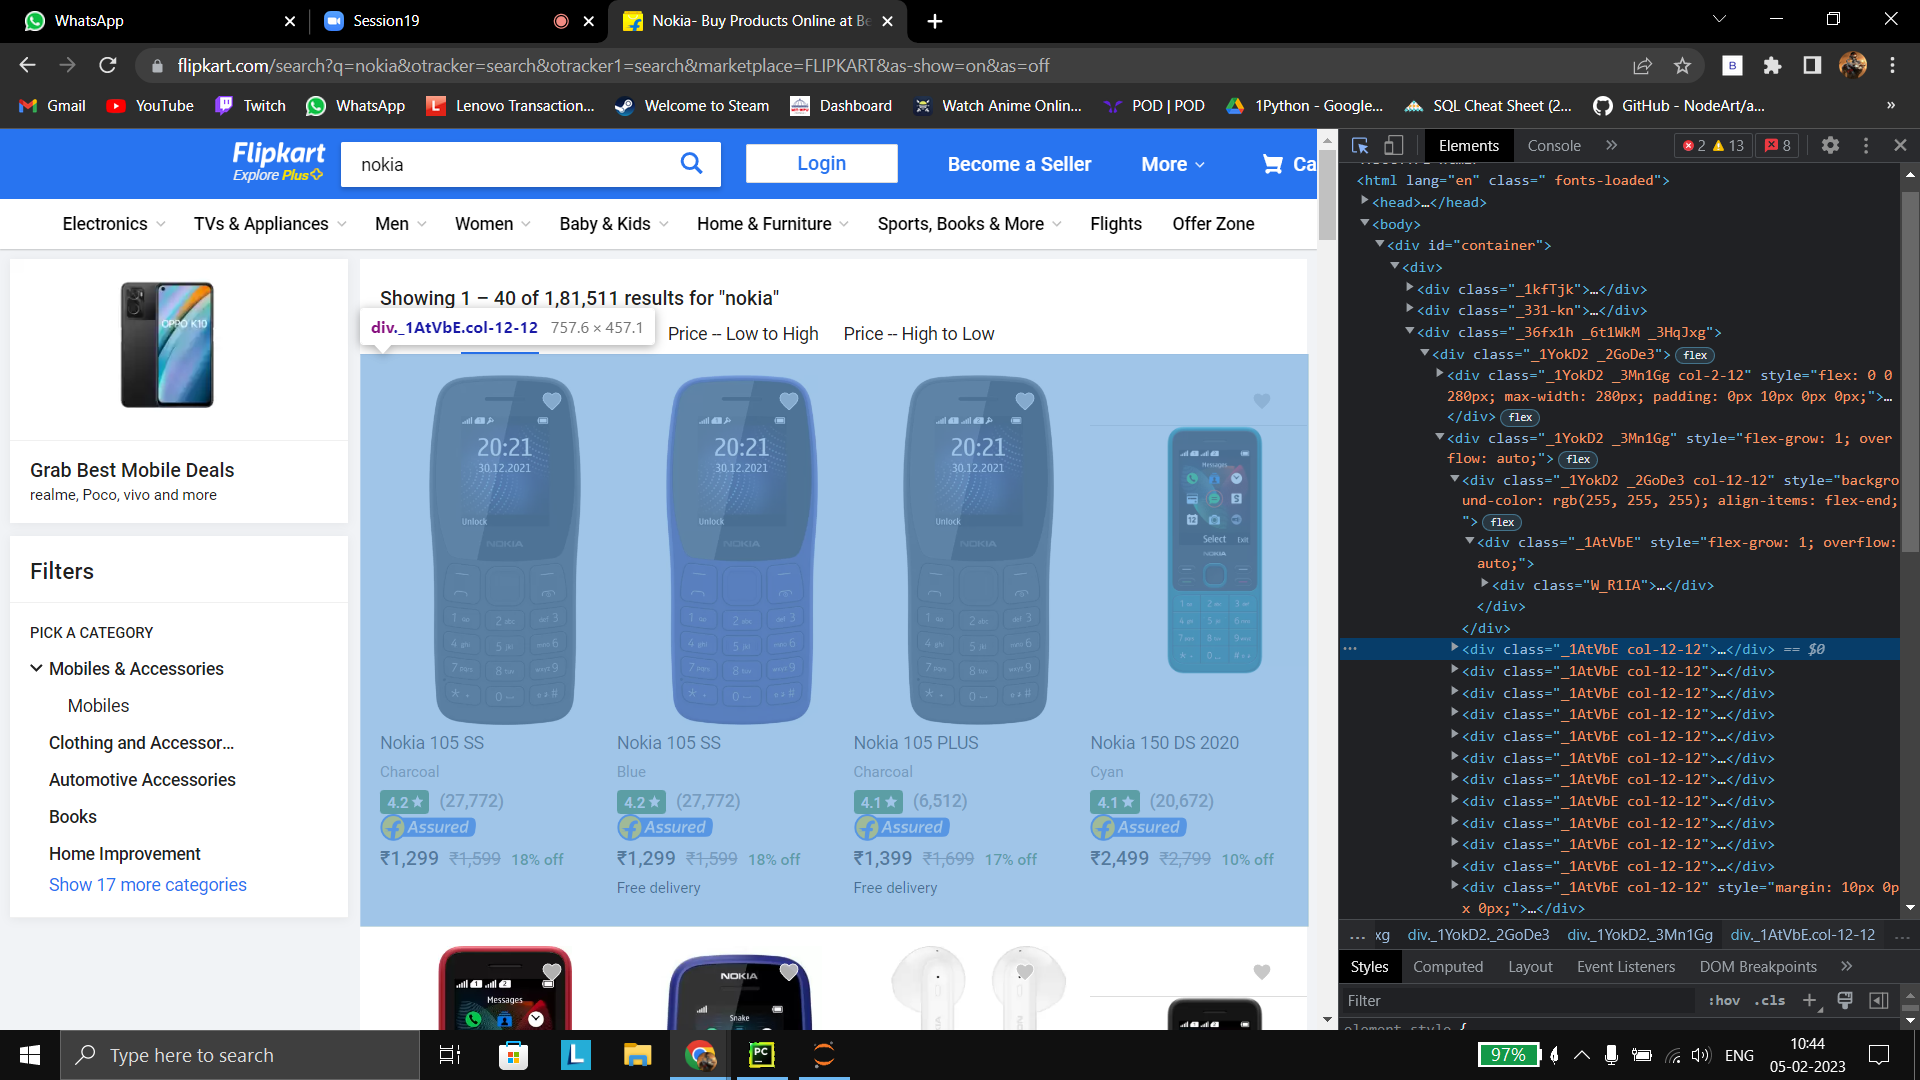

In [28]:
bigboxes = flipkart_html.findAll("div", {"class": "_1AtVbE col-12-12"})# we are selecting the first row via html tags

In [29]:
bigboxes # we are selecting the first row via html tags

[<div class="_1AtVbE col-12-12" style="padding:0px 0px 10px 0px"><a class="UYS4aW _3E_YdP" href="/mobiles/pr?sid=tyy%2C4io&amp;p%5B%5D=facets.fulfilled_by%255B%255D%3DPlus%2B%2528FAssured%2529&amp;p%5B%5D=facets.rating%255B%255D%3D4%25E2%2598%2585%2B%2526%2Babove&amp;p%5B%5D=facets.is_gst%255B%255D%3DGST%2BInvoice%2BAvailable&amp;ctx=eyJjYXJkQ29udGV4dCI6eyJhdHRyaWJ1dGVzIjp7InRpdGxlIjp7Im11bHRpVmFsdWVkQXR0cmlidXRlIjp7ImtleSI6InRpdGxlIiwiaW5mZXJlbmNlVHlwZSI6IlRJVExFIiwidmFsdWVzIjpbIkdyYWIgQmVzdCBNb2JpbGUgRGVhbHMiXSwidmFsdWVUeXBlIjoiTVVMVElfVkFMVUVEIn19fX19&amp;otracker=sp_browse_announcement_search.flipkart.com"><div class="_3ywSr_" style="padding-top:53.57%"><div class="_1bEAQy _312yBx" style="padding-top:53.57%"><img alt="A" class="_2OHU_q _2WCh1J"/><img alt="A" class="kJjFO0 _3DIhEh _9JTfqZ" src="https://rukminim1.flixcart.com/flap/100/100/image/c3bcb6e03b8f43d4.png?q=50"/></div></div><div class="_1sPNy4"><div class="_2LR_KO">Grab Best Mobile Deals</div><div class="tMzY0d">realme, Poc

In [30]:
type(bigboxes) ## this is a list 
				## starting and ending with square brackets

bs4.element.ResultSet

In [32]:
del bigboxes[0:3] ## we are deleting unwanted things
				## here we are deleting [0:3] i.e. 0,1,2 i.e. first three things

In [33]:
bigboxes

[<div class="_1AtVbE col-12-12"><div class="_13oc-S"><div data-id="MOBFHB83BCAVHGDN" style="width:25%"><div class="_4ddWXP"><a class="_2rpwqI" href="/nokia-110-ta-1302-ds/p/itm8251c58e28512?pid=MOBFHB83BCAVHGDN&amp;lid=LSTMOBFHB83BCAVHGDNQJYGCJ&amp;marketplace=FLIPKART&amp;q=nokia&amp;store=search.flipkart.com&amp;srno=s_1_17&amp;otracker=search&amp;fm=organic&amp;iid=0c4536e4-e06d-4467-a0a8-7e71fca6e177.MOBFHB83BCAVHGDN.SEARCH&amp;ppt=None&amp;ppn=None&amp;ssid=ox156psods0000001675573145589&amp;qH=0c23a8bf29a191f1" rel="noopener noreferrer" target="_blank"><div><div><div class="CXW8mj" style="height:280px;width:200px"><img alt="Nokia 110 TA-1302 DS" class="_396cs4" loading="eager" src="https://rukminim1.flixcart.com/image/612/612/k6fd47k0pkrrdj/mobile/j/a/h/nokia-110-ta-1192-ds-original-imafzgu8c4frhuza.jpeg?q=70"/></div></div></div><div class="_2hVSre _1eAP-x"><div class="_36FSn5"><svg class="_1l0elc" height="16" viewbox="0 0 20 16" width="16" xmlns="http://www.w3.org/2000/svg"><path

In [34]:
box=bigboxes[0]

In [35]:
box

<div class="_1AtVbE col-12-12"><div class="_13oc-S"><div data-id="MOBFHB83BCAVHGDN" style="width:25%"><div class="_4ddWXP"><a class="_2rpwqI" href="/nokia-110-ta-1302-ds/p/itm8251c58e28512?pid=MOBFHB83BCAVHGDN&amp;lid=LSTMOBFHB83BCAVHGDNQJYGCJ&amp;marketplace=FLIPKART&amp;q=nokia&amp;store=search.flipkart.com&amp;srno=s_1_17&amp;otracker=search&amp;fm=organic&amp;iid=0c4536e4-e06d-4467-a0a8-7e71fca6e177.MOBFHB83BCAVHGDN.SEARCH&amp;ppt=None&amp;ppn=None&amp;ssid=ox156psods0000001675573145589&amp;qH=0c23a8bf29a191f1" rel="noopener noreferrer" target="_blank"><div><div><div class="CXW8mj" style="height:280px;width:200px"><img alt="Nokia 110 TA-1302 DS" class="_396cs4" loading="eager" src="https://rukminim1.flixcart.com/image/612/612/k6fd47k0pkrrdj/mobile/j/a/h/nokia-110-ta-1192-ds-original-imafzgu8c4frhuza.jpeg?q=70"/></div></div></div><div class="_2hVSre _1eAP-x"><div class="_36FSn5"><svg class="_1l0elc" height="16" viewbox="0 0 20 16" width="16" xmlns="http://www.w3.org/2000/svg"><path 

In [36]:
type(box)

bs4.element.Tag

In [37]:
productLink = "https://www.flipkart.com" + box.div.div.div.a['href'] ##getting the product page link

In [38]:
productLink

'https://www.flipkart.com/nokia-110-ta-1302-ds/p/itm8251c58e28512?pid=MOBFHB83BCAVHGDN&lid=LSTMOBFHB83BCAVHGDNQJYGCJ&marketplace=FLIPKART&q=nokia&store=search.flipkart.com&srno=s_1_17&otracker=search&fm=organic&iid=0c4536e4-e06d-4467-a0a8-7e71fca6e177.MOBFHB83BCAVHGDN.SEARCH&ppt=None&ppn=None&ssid=ox156psods0000001675573145589&qH=0c23a8bf29a191f1'

In [39]:
prodRes = requests.get(productLink) ## putting the link in the requests

In [40]:
prodRes

<Response [200]>

In [42]:
prodRes.encoding='utf-8'

In [43]:
prodRes.text ## getting the text from the response

'<!doctype html><html lang="en"><head><link href="https://rukminim1.flixcart.com" rel="preconnect"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.905c37.css"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.c46047.css"/><meta http-equiv="Content-type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="fb:page_id" content="102988293558"/><meta property="fb:admins" content="658873552,624500995,100000233612389"/><meta name="robots" content="noodp"/><link rel="shortcut icon" href="https:///www/promos/new/20150528-140547-favicon-retina.ico"/><link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/><meta property="og:type" content="website"/><meta name="og_site_name" property="og:site_name" content="Flipkart.com"/><link rel="apple-touch-icon" sizes="57x57" href="/apple-touch-icon-57x57.p

In [44]:
prod_html = bs(prodRes.text, "html.parser") ##parsing using beatifulsoap

In [45]:
prod_html

<!DOCTYPE html>
<html lang="en"><head><link href="https://rukminim1.flixcart.com" rel="preconnect"/><link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.905c37.css" rel="stylesheet"/><link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.c46047.css" rel="stylesheet"/><meta content="text/html; charset=utf-8" http-equiv="Content-type"/><meta content="IE=Edge" http-equiv="X-UA-Compatible"/><meta content="102988293558" property="fb:page_id"/><meta content="658873552,624500995,100000233612389" property="fb:admins"/><meta content="noodp" name="robots"/><link href="https:///www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/><link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/><meta content="website" property="og:type"/><meta content="Flipkart.com" name="og_site_name" property="og:site_name"/><link href="/apple-touch-icon-57x57.png" rel="apple-touch-icon" sizes="57x

In [47]:
commentboxes = prod_html.find_all('div', {'class': "_16PBlm"}) ## comment box html code

In [48]:
commentbox = commentboxes[0]

In [49]:
commentbox

<div class="_16PBlm"><div class="col"><div class="col _2wzgFH"><div class="row"><div class="_3LWZlK _1BLPMq">5</div><p class="_2-N8zT">Awesome</p></div><div class="row"><div class="t-ZTKy"><div><div class="">So cute and best for old people I gifted this to my grandfather it's too easy to use and looks great! He's very happy! Thank you flipkart</div><span class="_1H-bmy"><span>READ MORE</span></span></div></div></div><div class="_2nMSwX _3oLIki"><div class="_21YjFX _2A07HP" style="background-image:url(https://rukminim1.flixcart.com/blobio/124/124/imr-202003/blobio-imr-202003_2864266f3c9143ba9a2d8a0d7941ac63.jpg?q=90), url();width:62px;height:62px"></div><div class="_21YjFX _2A07HP" style="background-image:url(https://rukminim1.flixcart.com/blobio/124/124/imr-202003/blobio-imr-202003_73e41733daea4074a532115ad5bc0171.jpg?q=90), url();width:62px;height:62px"></div></div><div class="row _3n8db9"><div class="row"><p class="_2sc7ZR _2V5EHH">Raima Mukherjee</p><svg class="_2a1p_T" height="14" 

In [50]:
name = commentbox.div.div.find_all('p', {'class': '_2sc7ZR _2V5EHH'})[0].text

In [51]:
name

'Raima Mukherjee'

In [52]:
rating = commentbox.div.div.div.div.text

In [53]:
rating

'5'

In [54]:
commentHead = commentbox.div.div.div.p.text

In [55]:
commentHead

'Awesome'

In [66]:
commentbox

<div class="_16PBlm"><div class="col"><div class="col _2wzgFH"><div class="row"><div class="_3LWZlK _1BLPMq">5</div><p class="_2-N8zT">Awesome</p></div><div class="row"><div class="t-ZTKy"><div><div class="">So cute and best for old people I gifted this to my grandfather it's too easy to use and looks great! He's very happy! Thank you flipkart</div><span class="_1H-bmy"><span>READ MORE</span></span></div></div></div><div class="_2nMSwX _3oLIki"><div class="_21YjFX _2A07HP" style="background-image:url(https://rukminim1.flixcart.com/blobio/124/124/imr-202003/blobio-imr-202003_2864266f3c9143ba9a2d8a0d7941ac63.jpg?q=90), url();width:62px;height:62px"></div><div class="_21YjFX _2A07HP" style="background-image:url(https://rukminim1.flixcart.com/blobio/124/124/imr-202003/blobio-imr-202003_73e41733daea4074a532115ad5bc0171.jpg?q=90), url();width:62px;height:62px"></div></div><div class="row _3n8db9"><div class="row"><p class="_2sc7ZR _2V5EHH">Raima Mukherjee</p><svg class="_2a1p_T" height="14" 

In [56]:
comtag = commentbox.div.div.find_all('div', {'class': ''})

In [57]:
comtag

[<div><div class="">So cute and best for old people I gifted this to my grandfather it's too easy to use and looks great! He's very happy! Thank you flipkart</div><span class="_1H-bmy"><span>READ MORE</span></span></div>,
 <div class="">So cute and best for old people I gifted this to my grandfather it's too easy to use and looks great! He's very happy! Thank you flipkart</div>,
 <div></div>]

In [58]:
custComment = comtag[0].div.text

In [59]:
custComment

"So cute and best for old people I gifted this to my grandfather it's too easy to use and looks great! He's very happy! Thank you flipkart"